In [9]:
import os
import cv2
import json
import random
import natsort
import matplotlib.pyplot as plt
import numpy as np

random.seed(44)

In [2]:
json_path = os.path.expanduser("~/Desktop/joo/data/korad/data/custom/labeling/")
tiff_path = os.path.expanduser("~/Desktop/joo/data/korad/data/custom/images_plan/")
box_path = os.path.expanduser("~/Desktop/joo/data/korad/data/custom/box/")
# test_path = os.path.expanduser("~/Desktop/joo/data/korad/data/custom/test/")

numbers = os.listdir(tiff_path)
numbers.sort()

all_dict = {}

In [3]:
classes = ['AlligatorCrack', 'ConcreteCrack', 'Spalling', 'Efflorescene', 'Exposure']

colors = []
for i in range(len(classes)):
    rd1 = random.randint(0, 256)
    rd2 = random.randint(0, 256)
    rd3 = random.randint(0, 256)
    rd_color = (rd1, rd2, rd3)
    colors.append(rd_color)


labeling 이랑 image랑 file 명 맞춰서 dictionary 담기

In [4]:
all_dict = {}
folder_dict = {}

# 업체 데이터 오류 파일
with open("./korad_boxes/error_list.json", "r") as f:
    f = json.load(f)
    error =list(f.keys())

for number in numbers:
    json_root,_,json_list = next(os.walk(os.path.join(json_path+number)))
    tiff_root,_,tiff_list = next(os.walk(os.path.join(tiff_path+number)))    
    json_list.sort()
    tiff_list.sort()
    slicing_num = -5

    if number == "01":
        test_tiff_list = set(map(lambda x : x.split(".jpg")[0], tiff_list))
        test_json_list = set(map(lambda x : x.split(".json")[0], json_list))    
        result = natsort.natsorted(list(test_tiff_list - test_json_list))
        for a in error:
            result.append(a)
        
        slicing_num = -4
    temp_dict = {}

    for tiff_file in tiff_list:
        try:
            result.index(tiff_file[:slicing_num])
            all_dict[tiff_file[:slicing_num]] = [number, tiff_file, None]
            temp_dict[tiff_file[:slicing_num]] = [number, tiff_file, None]
        except ValueError:            
            all_dict[tiff_file[:slicing_num]] = [number, tiff_file, tiff_file[:slicing_num]+".json"]
            temp_dict[tiff_file[:slicing_num]] = [number, tiff_file, tiff_file[:slicing_num]+".json"]
    folder_dict[number] = temp_dict



폴더별 3900개 맞아야 함

In [23]:
# 3900 check!!
print(f"total : {len(all_dict)}")

for i in folder_dict:
    print(f"folder {i} count : {len(folder_dict[i])}")

# json 으로 만들기.
# with open("./korad_boxes/all_list.json", 'w', encoding='utf-8') as file:
#     json.dump(all_dict, file)
    
# with open("./korad_boxes/folder_list.json", 'w', encoding='utf-8') as file:
#     json.dump(folder_dict, file)

total : 23400
folder 01 count : 3900
folder 02 count : 3900
folder 03 count : 3900
folder 04 count : 3900
folder 05 count : 3900
folder 06 count : 3900


In [227]:
x_label = []
y_label = {}
img_size = []
img_size_512 = []
a = 0

def byte_transform(bytes, to, bsize=1024):
    a = {'k' : 1, 'm': 2, 'g' : 3, 't' : 4, 'p' : 5, 'e' : 6 }
    r = float(bytes)
    for i in range(a[to]):
        r = r / bsize
    return round(r,2)

### 이미지 사이즈 체크

In [228]:
for number in folder_dict:
    # if number != "06": continue

    tiff_root,_,tiff_list = next(os.walk(os.path.join(tiff_path+number)))    

    for index, file in enumerate(tiff_list):

        img_wh = cv2.imread(os.path.join(tiff_root+"/"+file),cv2.IMREAD_GRAYSCALE)
        height,width = img_wh.shape
        temp = str(width)+"x"+str(height)
        if width == 512:
            img_size_512.append(file)
        try:
            if x_label[x_label.index(temp)] != None:
                y_label[temp] = y_label[temp] + 1
        except ValueError:
            x_label.append(temp)
            y_label[temp] = 1
        
        img = os.stat(os.path.join(tiff_root+"/"+file)).st_size
        img = byte_transform(img, "m")
        img_size.append(img)

        # break
    # break

## Visualize

['2560x1440', '512x512', '512x446', '512x442']
[23175, 223, 1, 1]


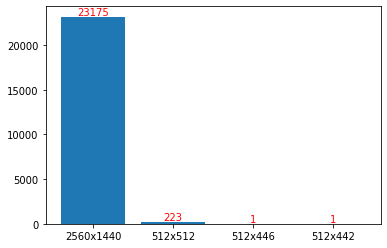

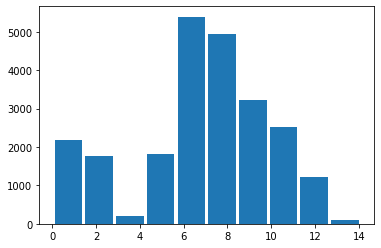

In [229]:
print(x_label)
temp_a = []
for i in y_label.values():
    temp_a.append(i)
print(temp_a)
plt.bar(x_label, temp_a)
for i, v in enumerate(x_label):
    plt.text(v, temp_a[i], temp_a[i], fontsize=10, color = "red", horizontalalignment='center',verticalalignment='bottom')
plt.show()

plt.hist(img_size, histtype='bar', rwidth=.9,)
plt.xlabel("",size=.5)
plt.show()

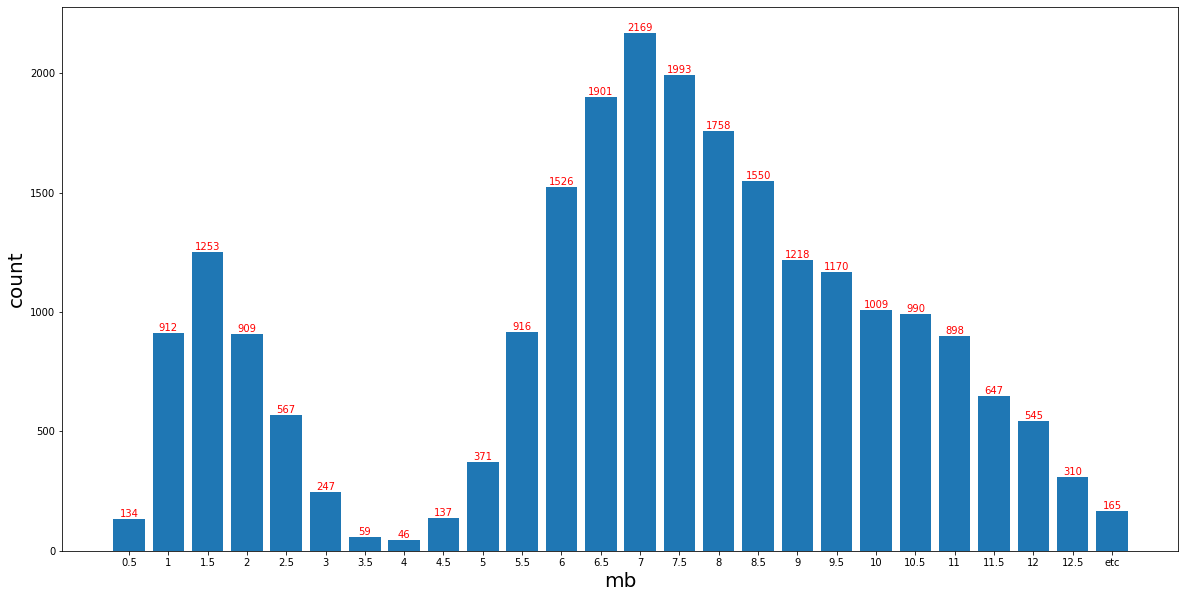

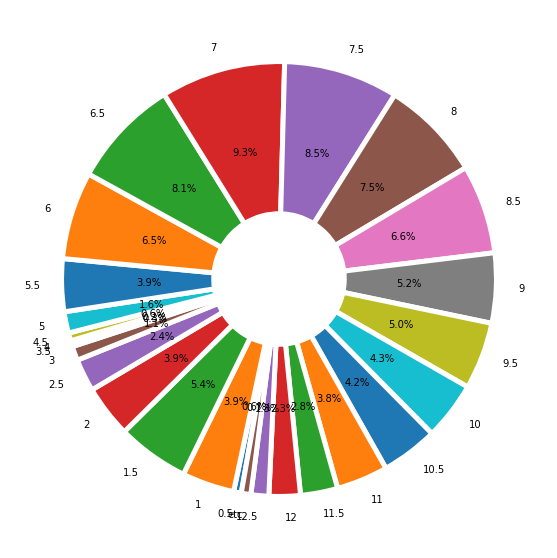

In [230]:
cnt_x = ["0.5","1","1.5","2","2.5","3","3.5","4","4.5","5","5.5","6","6.5","7","7.5","8","8.5","9","9.5","10","10.5","11","11.5","12","12.5","etc"]
cnt = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
cnt_05 = []
for i in img_size:
    if i < 0.5:cnt_05.append(i);cnt[0] = cnt[0]+1;continue
    elif i < 1:cnt[1] = cnt[1]+1;continue
    elif i < 1.5:cnt[2] = cnt[2]+1;continue
    elif i < 2:cnt[3] = cnt[3]+1;continue
    elif i < 2.5:cnt[4] = cnt[4]+1;continue
    elif i < 3:cnt[5] = cnt[5]+1;continue
    elif i < 3.5:cnt[6] = cnt[6]+1;continue
    elif i < 4:cnt[7] = cnt[7]+1;continue
    elif i < 4.5:cnt[8] = cnt[8]+1;continue
    elif i < 5:cnt[9] = cnt[9]+1;continue
    elif i < 5.5:cnt[10] = cnt[10]+1;continue
    elif i < 6:cnt[11] = cnt[11]+1;continue
    elif i < 6.5:cnt[12] = cnt[12]+1;continue
    elif i < 7:cnt[13] = cnt[13]+1;continue
    elif i < 7.5:cnt[14] = cnt[14]+1;continue
    elif i < 8:cnt[15] = cnt[15]+1;continue
    elif i < 8.5:cnt[16] = cnt[16]+1;continue
    elif i < 9:cnt[17] = cnt[17]+1;continue
    elif i < 9.5:cnt[18] = cnt[18]+1;continue
    elif i < 10:cnt[19] = cnt[19]+1;continue
    elif i < 10.5:cnt[20] = cnt[20]+1;continue
    elif i < 11:cnt[21] = cnt[21]+1;continue
    elif i < 11.5:cnt[22] = cnt[22]+1;continue
    elif i < 12:cnt[23] = cnt[23]+1;continue
    elif i < 12.5:cnt[24] = cnt[24]+1;continue
    else:cnt[25] = cnt[25]+1
plt.figure(figsize=(20,10))
plt.bar(cnt_x, cnt)
for i, v in enumerate(cnt_x):
    plt.text(v, cnt[i], cnt[i], fontsize=10, color = "red", horizontalalignment='center',verticalalignment='bottom')
plt.xlabel("mb", fontsize=20)
plt.ylabel("count", fontsize=20)
plt.show()

wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

plt.figure(figsize=(10,10))
plt.pie(cnt, labels=cnt_x, autopct='%.1f%%', startangle=260, counterclock=False,  wedgeprops=wedgeprops)
plt.show()

In [231]:
print(len(img_size_512))
print(len(cnt_05))

225
134
